In [3]:
import sqlite3
import random
import matplotlib.pyplot as plt
import time
import datetime
%matplotlib inline

conexao = sqlite3.connect('produtos2.db')
db_cursor = conexao.cursor()

def create_table():
    db_cursor.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, data TEXT, nome_produto TEXT, valor REAL)')

def data_insert():
    nova_data = datetime.datetime.now()
    novo_nome = 'Monitor'
    novo_valor = random.randrange(50,100)
    db_cursor.execute('INSERT INTO produtos (data, nome_produto, valor) VALUES (?,?,?)', (nova_data, novo_nome, novo_valor))
    conexao.commit()

def leitura_dados():
    db_cursor.execute('SELECT * FROM PRODUTOS')
    for linha in db_cursor.fetchall():
        print(linha)

def atualiza_dados():
    db_cursor.execute('UPDATE produtos SET valor = 70.00 WHERE valor = 80.0')
    conexao.commit()

def remove_dados():
    db_cursor.execute('DELETE FROM produtos WHERE valor < 60.0')
    conexao.commit()

def criar_grafico():
    db_cursor.execute('SELECT id, valor FROM produtos')
    ids = []
    valores = []
    dados = db_cursor.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
    
    plt.bar(ids, valores)
    plt.show()

In [14]:
for i in range(10):
    data_insert()
    time.sleep(1)


In [16]:
atualiza_dados()


In [9]:
remove_dados()

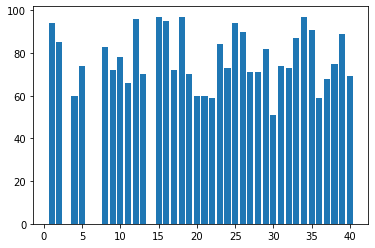

In [17]:
criar_grafico()

In [ ]:
db_cursor.close()
conexao.close()